### TO-DO
1. Add in matplotlib to side panel
2. Make fake graph with random sliders and boxes and whatever to change the graph
3. Integrate it into the main editor instance
4. Connect internal model values with the sliders and graph and make it "real"

In [1]:
%matplotlib inline
import jupyterlab_nodeeditor as jlne
from yggdrasil import yamlfile
import matplotlib.pyplot as plt
import ipywidgets as widgets
import numpy as np
import bqplot as bq

In [2]:
filename = "X:\College\Grad School\Research\gc-Xyzic\jupyterlab_nodeeditor\examples\model_example.yml"
model_set = yamlfile.parse_yaml(filename, model_only=True)
model_sets = jlne.parse_yggdrasil_yaml(filename)

schema = yamlfile.get_schema()
socket_types = tuple(schema.form_schema['definitions']['schema']['definitions']['simpleTypes']['enum'])

ne = jlne.NodeEditor(socket_types = socket_types)

In [3]:
ne.socket_types = ('Temperature', 'Rainfall', 'Delta Time', 'Results')
ne.add_component(
    {"inputs": [
                {'title': 'Temperature Morning', 'key': 'temp1', 'socket_type': 'Temperature'},
                {'title': 'Temperature Afternoon', 'key': 'temp2', 'socket_type': 'Temperature'},
                {'title': 'Temperature Evening', 'key': 'temp3', 'socket_type': 'Temperature'}
                ],
     "outputs": [
                {'title': 'Results', 'key': 'results', 'socket_type': 'Temperature'}
                ],
     "title": "Temperature Averaging"
})

In [4]:
ne

In [6]:
# Children[0] is an ipywidget label
# "Inputs" is a VBox as is "Outputs"
ne.node_editor.nodes[0].display_element.children[0].value = "Test Name Node 1"

In [7]:
# Sample on how to add in widgets to the sidebar
# slider = widgets.IntSlider()
# ne.node_editor.nodes[0].display_element.children += (slider,)
# slider.value = 10
# slider

In [22]:
# Work on the plot here
# Open initial sample plot png
with open("test.png", "rb") as f:
    image = f.read()
plotimg = widgets.Image(value = image, format = "png")

# Use this for changing the plot
def update_plot(new_image = plotimg):
    plotimg.value = new_image
    
# Test it out
with open("test.png", "rb") as test:
    new_plot = test.read()
    update_plot(new_plot)

In [23]:
ne.node_editor.nodes[0].display_element.children += (plotimg,)

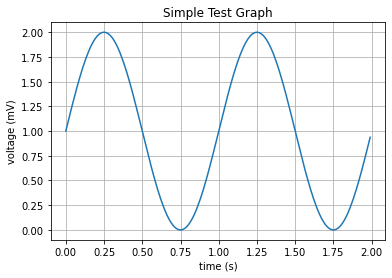

In [21]:
t = np.arange(0.0, 2.0, 0.01)
s = 1 + np.sin(2 * np.pi * t)

fig, ax = plt.subplots()
ax.plot(t, s)

ax.set(xlabel='time (s)', ylabel='voltage (mV)', title = "Simple Test Graph")
ax.grid()

fig.savefig("test.png")